In [196]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
#1. Считайте файл
anime_df = pd.read_csv('anime.csv')
#2. Выведите первые 10 строк датафрейма
print(anime_df.head(20).to_string())

                               Title      Production Episodes       Source                                     Genre                    Airdate  Rating     Voters                              Theme
0                 Shingeki no Kyojin      Wit Studio       25        Manga              Action,Drama,Fantasy,Mystery   Apr 7, 2013, 01:58 (JST)    8.52  3,142,121               Military,Super Power
1   Fullmetal Alchemist: Brotherhood           Bones       64        Manga     Action,Adventure,Comedy,Drama,Fantasy   Apr 5, 2009, 17:00 (JST)    9.16  2,676,911                           Military
2                   Sword Art Online    A-1 Pictures       25  Light novel          Action,Adventure,Fantasy,Romance   Jul 8, 2012, 00:00 (JST)    7.20  2,586,628                               Game
3                      One Punch Man        Madhouse       12    Web manga         Action,Comedy,Sci-Fi,Supernatural   Oct 5, 2015, 01:05 (JST)    8.52  2,583,068                 Parody,Super Power
4         

In [197]:
#3. Выведите информацию о столбцах
print(anime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1992 non-null   object 
 1   Production  1992 non-null   object 
 2   Episodes    1992 non-null   object 
 3   Source      1992 non-null   object 
 4   Genre       1992 non-null   object 
 5   Airdate     1020 non-null   object 
 6   Rating      1944 non-null   float64
 7   Voters      1992 non-null   object 
 8   Theme       1992 non-null   object 
dtypes: float64(1), object(8)
memory usage: 140.2+ KB
None


In [198]:
#4. Приведите названия столбцов к единому виду
# нижний регистр и "_" вместо пробелов
anime_df['New column'] = None
columns = anime_df.columns
print(*columns)
modified_columns = []
for column in columns:
    modified_column = ''
    for character in column:
        if character == ' ':
            modified_column += '_'
        else:
            modified_column += character
            
    modified_columns.append(modified_column.casefold())

anime_df.columns = modified_columns
print(*anime_df.columns)

Title Production Episodes Source Genre Airdate Rating Voters Theme New column
title production episodes source genre airdate rating voters theme new_column


In [199]:
#5. Для каждого столбца с числами построить статистики
anime_df.voters = anime_df.voters.str.replace(',', '')
anime_df.episodes = pd.to_numeric(anime_df.episodes, errors='coerce')
anime_df.voters = pd.to_numeric(anime_df.voters, errors='coerce')
print(anime_df.describe())

          episodes       rating        voters
count  1939.000000  1944.000000  1.992000e+03
mean     14.975245     7.150849  1.643311e+05
std      28.116711     0.709454  3.135926e+05
min       1.000000     2.960000  8.662000e+03
25%       1.000000     6.720000  2.126500e+04
50%      12.000000     7.210000  5.478550e+04
75%      13.000000     7.590000  1.585070e+05
max     500.000000     9.160000  3.142121e+06


In [200]:
#6. Для каждого из столбцов, содержащих категориальные значения, 
# вывести все возможные значения с количеством их повторений
#Column = "Production"
print(anime_df.production.value_counts().head(20).to_string())

Toei Animation       130
Sunrise              125
Madhouse              83
A-1 Pictures          78
Bones                 73
Production I.G        72
Studio Pierrot        68
Studio Deen           62
J.C.Staff             58
OLM                   49
Gonzo                 48
TMS Entertainment     45
-                     39
Xebec                 33
ufotable              33
Arms                  29
Satelight             28
AIC                   27
Wit Studio            27
8bit                  25


In [201]:
#Column = "Source"
print(anime_df.source.value_counts().to_string())

Manga           818
Original        468
Light novel     263
Game            201
Novel            61
Visual novel     51
Other            48
-                39
Web manga        32
Card game         9
Book              1
Picture book      1


In [202]:
#7. Заполните пропуски в данных
anime_df.production = anime_df.production.str.replace('-', 'Unknown')
anime_df.source = anime_df.source.str.replace('-', 'Unknown')
anime_df.theme = anime_df.theme.str.replace('-', 'Unknown')
#anime_df.episodes = anime_df.episodes.fillna('Unknown')
anime_df.airdate = anime_df.airdate.fillna('Unknown')

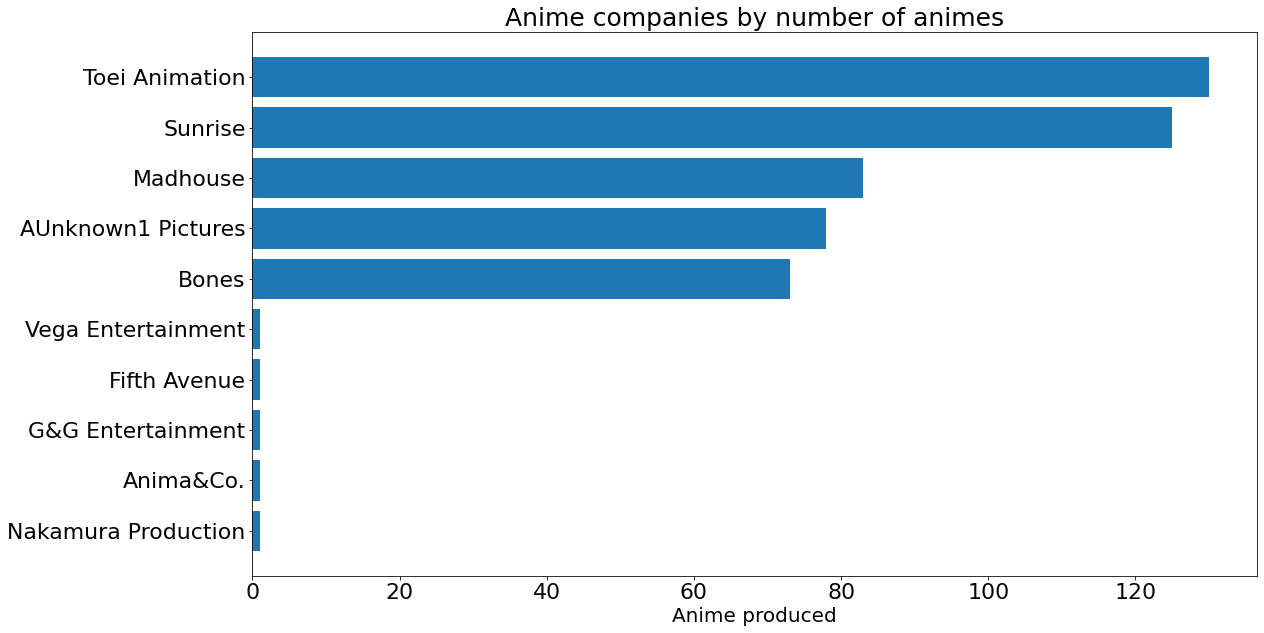

In [212]:
#8.a
anime_companies = anime_df.production.value_counts()
biggest = anime_companies.head(5)
smallest = anime_companies.tail(5)
result = pd.concat([smallest, biggest])
result = result.sort_values()
fig1, ax = plt.subplots(figsize = (18,10))
ax.barh(result.index, result)
ax.set_xlabel("Anime produced", size = 20)
ax.set_title("Anime companies by number of animes", size = 25)
plt.show()

1.0     625
2.0      72
3.0      57
4.0      40
5.0      13
6.0      45
7.0      12
8.0      13
9.0       5
10.0     32
11.0     22
12.0    385
13.0    158
14.0      6
15.0      4
16.0      2
17.0      1
18.0      2
20.0      4
21.0      5
22.0     12
23.0      4
24.0     97
25.0     57
Name: episodes, dtype: int64


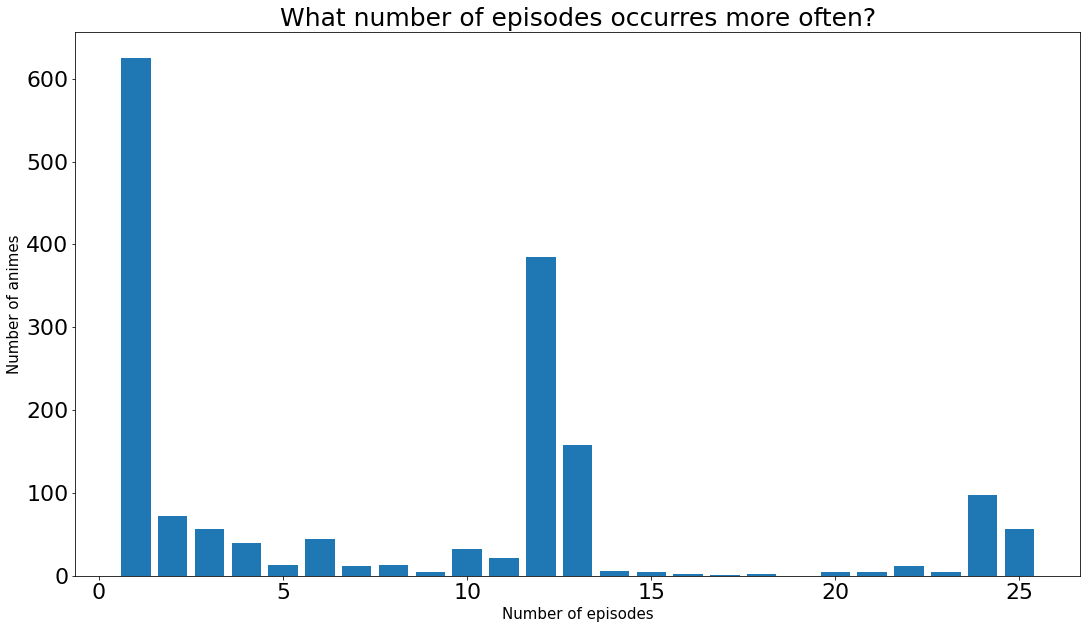

In [204]:
#8.b
numberOfEpisodes = anime_df.episodes.value_counts()
numberOfEpisodes = numberOfEpisodes.sort_index()
numberOfEpisodes = numberOfEpisodes.head(24)
print(numberOfEpisodes)
fig2, ax = plt.subplots(figsize = (18,10))
ax.bar(numberOfEpisodes.index, numberOfEpisodes)
ax.set_xlabel("Number of episodes", size = 15)
ax.set_ylabel("Number of animes", size = 15)
ax.set_title("What number of episodes occurres more often?", size = 25)
plt.show()

Manga           818
Original        468
Light novel     263
Game            201
Novel            61
Visual novel     51
Other            48
Unknown          39
Web manga        32
Card game         9
Book              1
Picture book      1
Name: source, dtype: int64


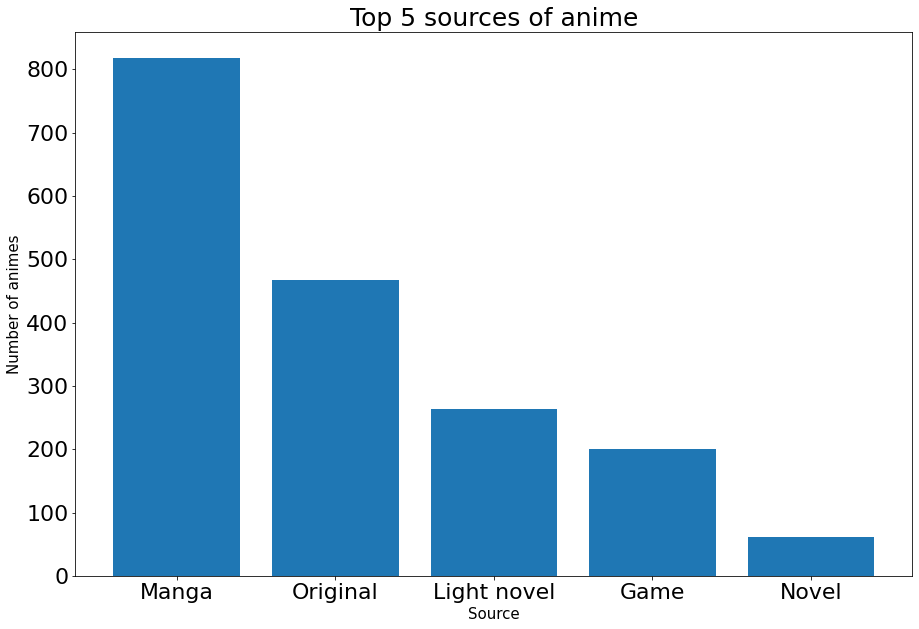

In [205]:
#8.c
sources = anime_df.source.value_counts()
print(sources)
sources = sources.head(5)
fig3, ax = plt.subplots(figsize = (15,10))
ax.bar(sources.index, sources)
ax.set_xlabel("Source", size = 15)
ax.set_ylabel("Number of animes", size = 15)
ax.set_title("Top 5 sources of anime", size = 25)
plt.show()

                       theme  number_of_animes
42               Super Power               311
22                     Mecha               277
24                  Military               224
35                    School               185
39                   Shounen               179
16                Historical               148
21              Martial Arts               141
44                   Unknown               134
8                     Demons               131
41                     Space               118
11                Funimation                90
15                     Harem                82
13                      Game                76
34                   Samurai                73
33             Psychological                69
36                    Seinen                66
31                    Police                63
47                   Vampire                58
30                    Parody                45
3         Aniplex of America                45
18           

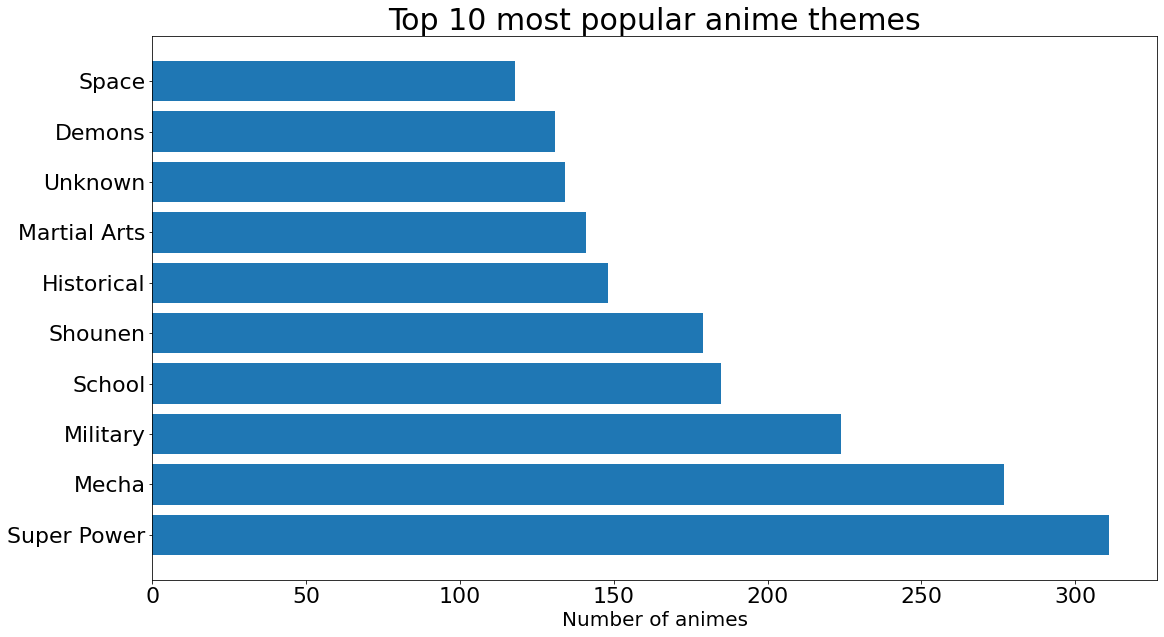

In [206]:
#8.d
strings = anime_df.theme
list_of_themes = []
for string in strings:
    themes = string.split(sep=',') 
    for theme in themes:
        list_of_themes.append(theme)

themes_series = pd.Series(list_of_themes)
themes_series = themes_series.sort_values()
themes_series = themes_series.drop_duplicates()

list_of_themes = []
for theme in themes_series:
    list_of_themes.append([theme, len(anime_df[anime_df.theme.str.contains(theme)])])

df = pd.DataFrame(list_of_themes, columns=['theme', 'number_of_animes'])
df = df.sort_values('number_of_animes', ascending=False)
print(df)
df = df.head(10)
fig, ax = plt.subplots(figsize = (18,10))
ax.barh(df.theme, df.number_of_animes)
ax.set_xlabel("Number of animes", size = 20)
ax.set_title("Top 10 most popular anime themes", size = 30)
plt.show()

                          company  average_rating
65                B.CMAY PICTURES        8.400000
51          Bandai Namco Pictures        8.335000
23                  Studio Ghibli        8.325000
120      China Literature Limited        8.260000
156                Yumeta Company        8.180000
162      Kitty Film Mitaka Studio        8.110000
119      Colored Pencil Animation        8.060000
182  Sparkly Key Animation Studio        8.010000
151           Nice Boat Animation        7.920000
139        Minami Machi Bugyousho        7.910000
89                    Square Enix        7.840000
174         Phoenix Entertainment        7.820000
54                          Khara        7.812000
0                      Wit Studio        7.808889
61                         Orange        7.800000
26                   Science SARU        7.790000
72                    Geno Studio        7.755000
149           Nakamura Production        7.700000
5                        ufotable        7.690000


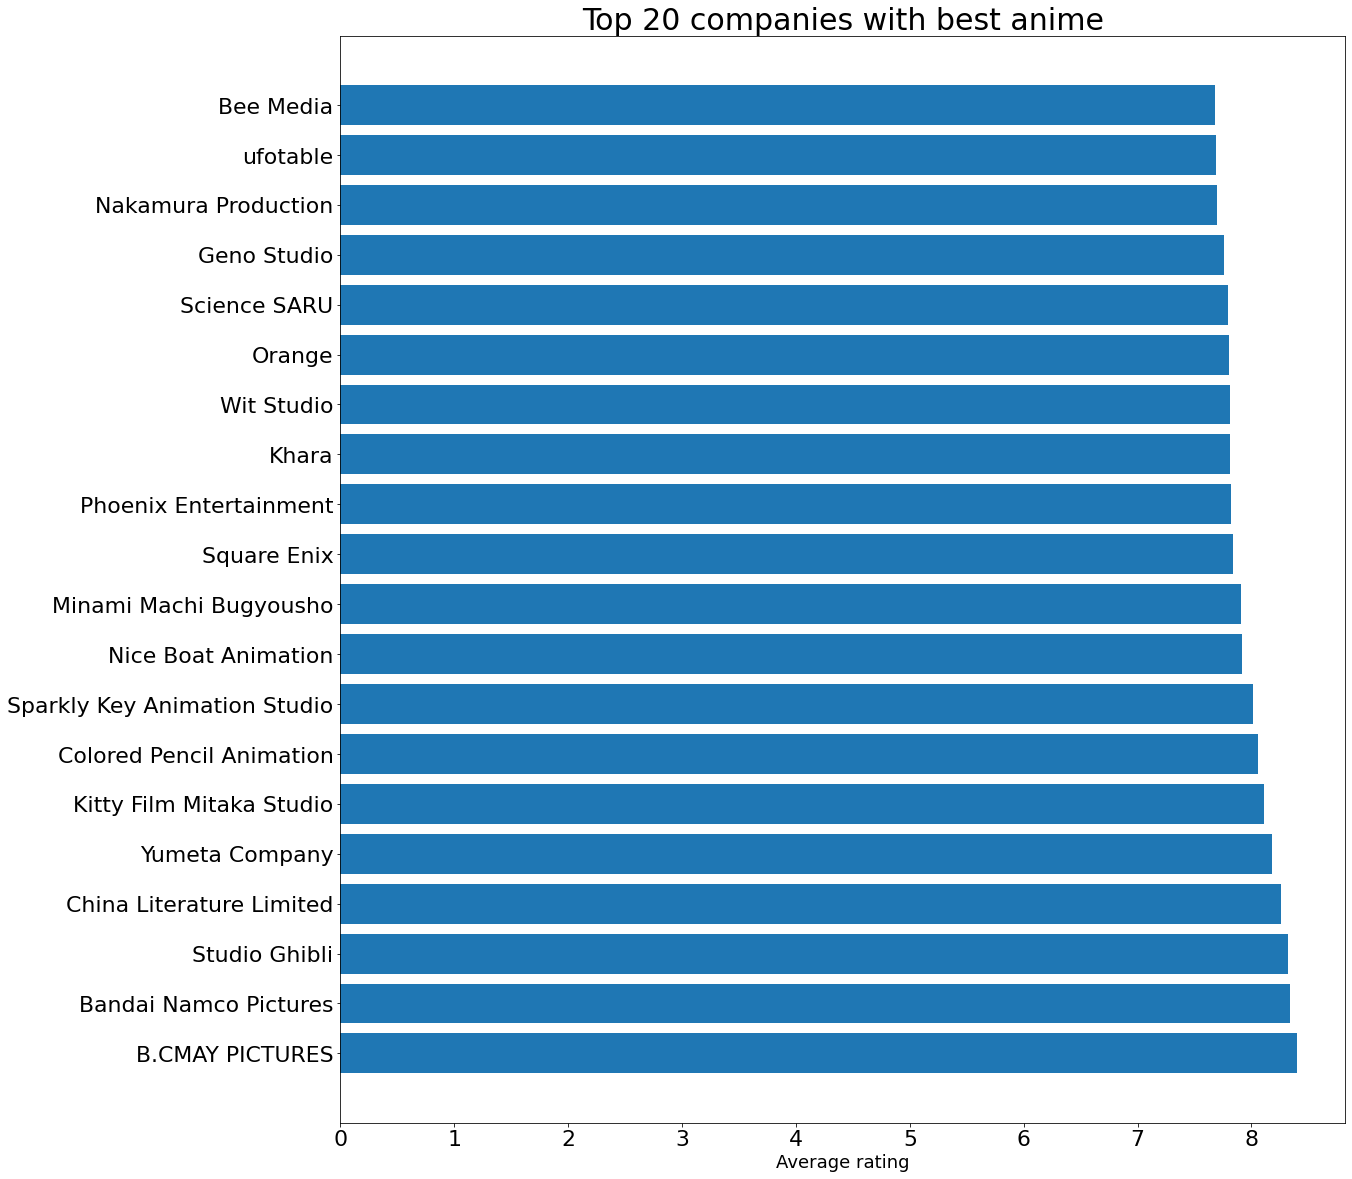

In [207]:
#9
rating = pd.Series(float)
companies = anime_df.production.drop_duplicates()
my_list = []
for company in companies:
    rating = anime_df.query("production == @company").rating
    mean = rating.mean()
    my_list.append([company, mean])

df = pd.DataFrame(my_list,columns=['company', 'average_rating'])
df = df.sort_values('average_rating', ascending=False)
print(df.head(20))
df = df.head(20)
fig, ax = plt.subplots(figsize = (18,20))
ax.barh(df.company, df.average_rating)
ax.set_xlabel("Average rating", size = 18)
ax.set_title("Top 20 companies with best anime", size = 30)
plt.show()

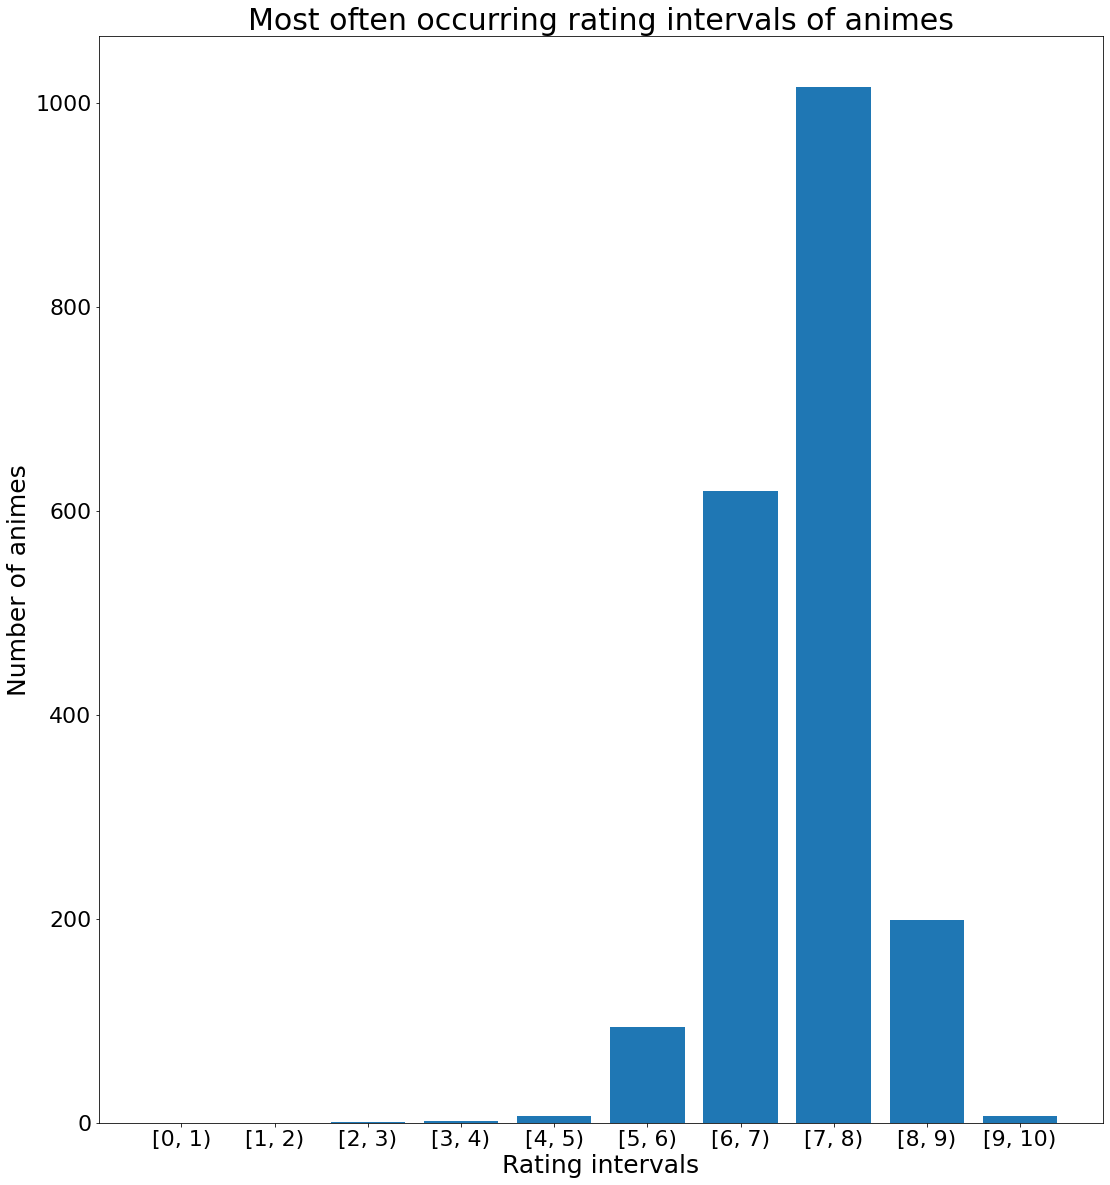

In [208]:
#10
my_list = []
for i in range(0, 10):
    number_of_animes = len(anime_df.query("rating >= @i and rating < @i+1"))
    my_list.append(['[' + str(i)+ ', ' + str(i+1) + ')' , number_of_animes] )

df = pd.DataFrame(my_list, columns=['rating_interval', 'number_of_animes'])

fig, ax = plt.subplots(figsize = (18,20))
ax.bar(df.rating_interval, df.number_of_animes)
ax.set_xlabel("Rating intervals", size = 25)
ax.set_ylabel("Number of animes", size = 25)
ax.set_title("Most often occurring rating intervals of animes", size = 30)
plt.show()

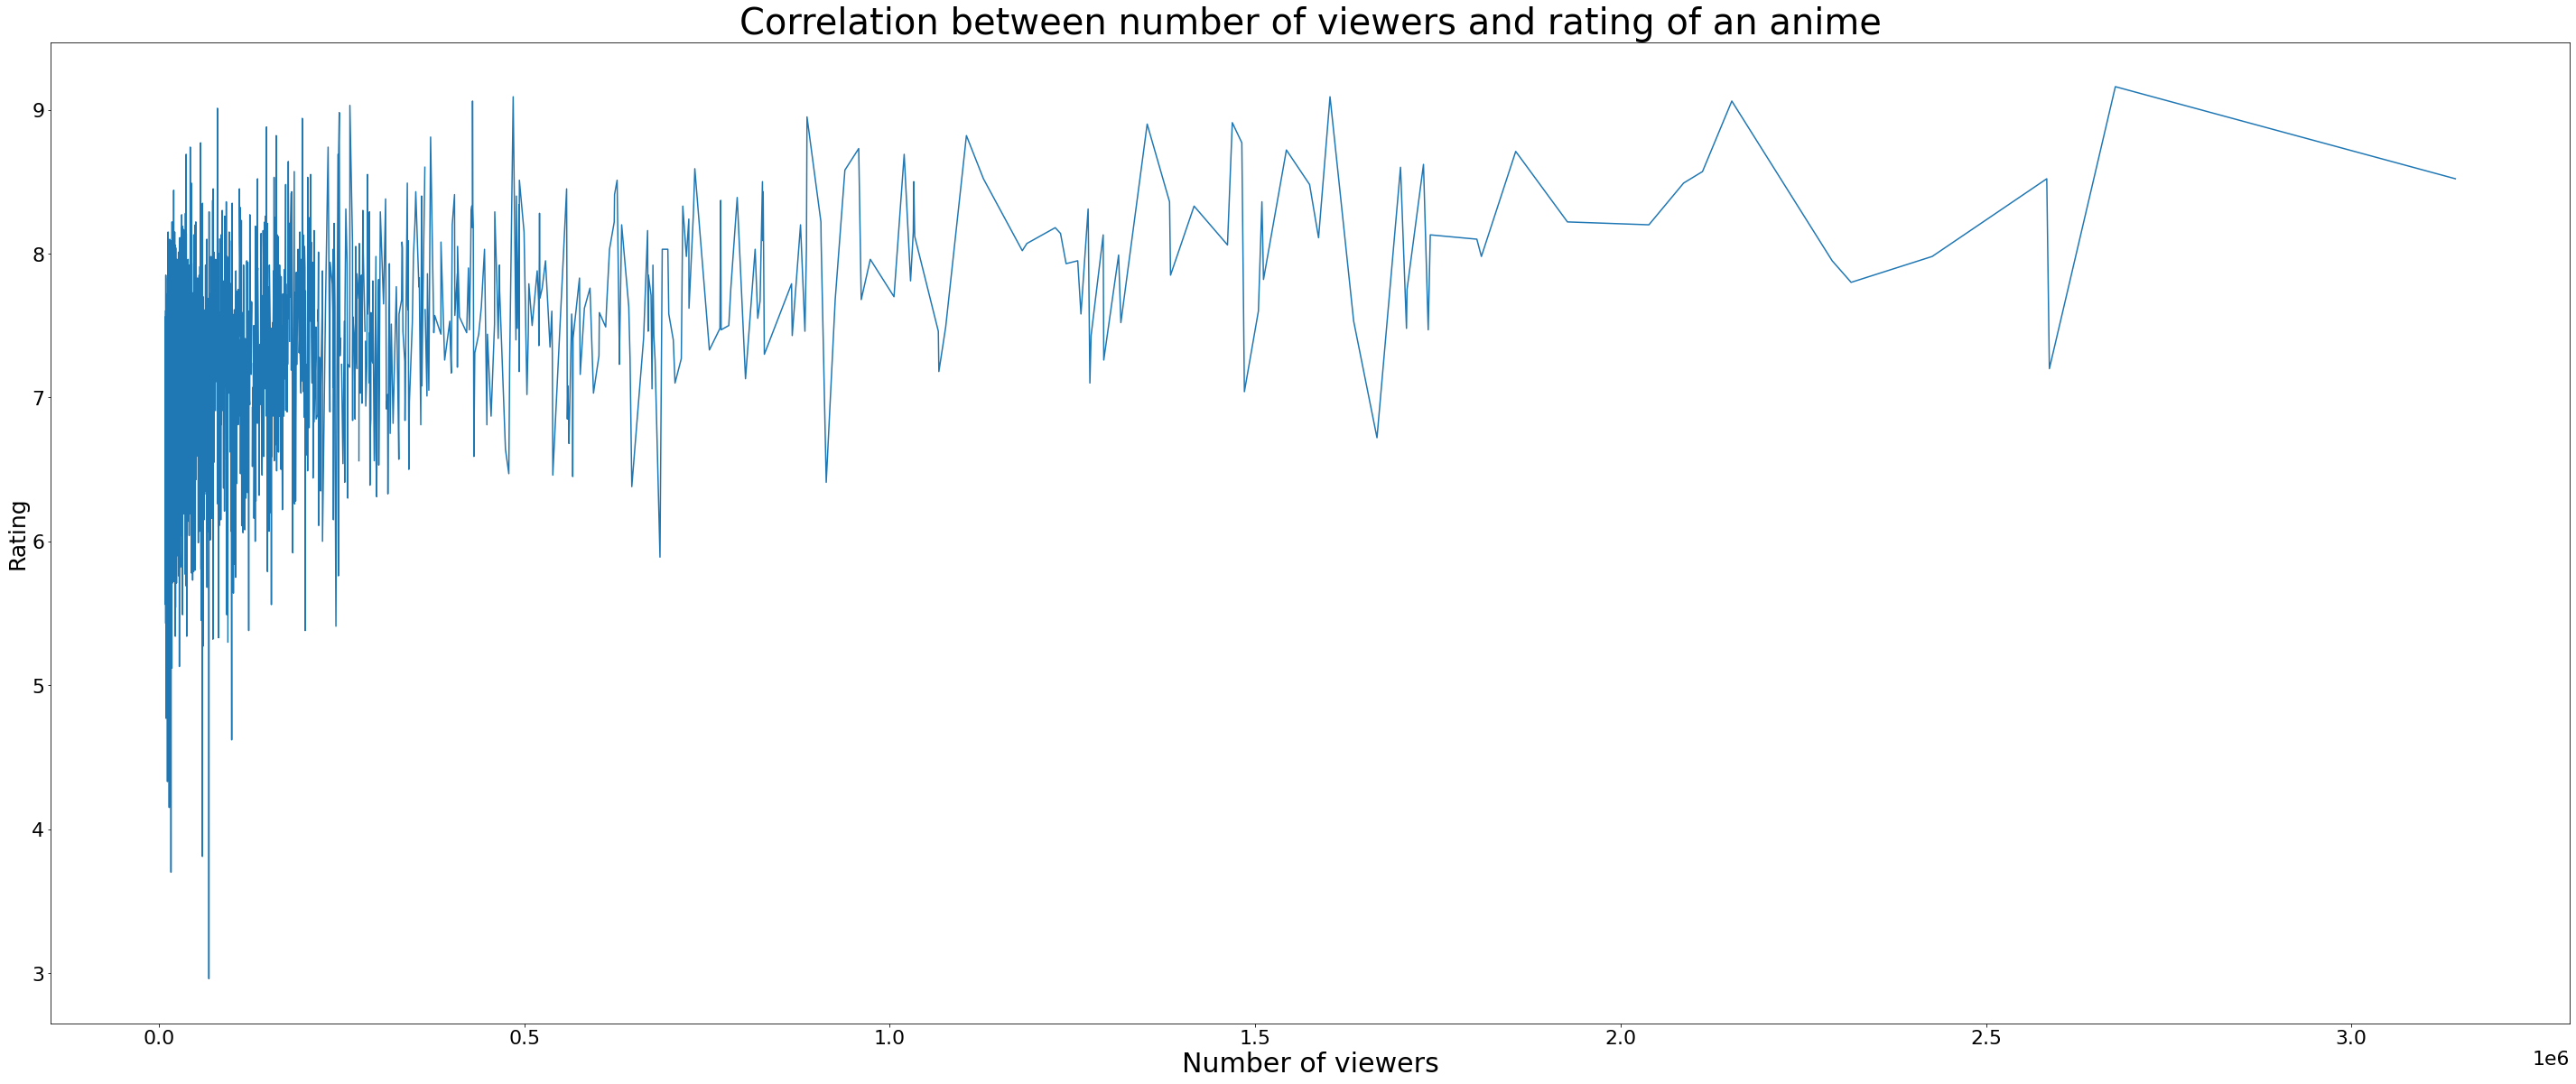

In [209]:
#12
fig, ax = plt.subplots(figsize = (50,20))
ax.plot(anime_df.voters, anime_df.rating)
ax.set_xlabel("Number of viewers", size = 30)
ax.set_ylabel("Rating", size = 25)
ax.set_title("Correlation between number of viewers and rating of an anime", size = 40)
plt.show()